##Problem 1 
Consider the equation $x^5 = x^2 + 10$

###A) 
Find an interval \[ a , b \] of length one in which there is gauranteed to be a root

I am going to check for a sign change. My first guess is x = 1 and x = 2. So let's check.

In [1]:
from math import log
f = lambda x: x**2 + 10 - x**5

In [2]:
print(f(1))
print(f(2))

10
-18


Hence we can see that there is a sign change and thus there is a root on the interval \[1,2\]

###B)
Compute the next 3 improved approximatations given by the bisection method. Note we are starting with $x \in$ \[1,2\]. 

In [3]:
f(1.5)

4.65625

So now $x \in$ \[1.5,2\] 

In [5]:
f(1.75)

-3.3505859375

Hence we have $x \in$ \[1.5,1.75\]

In [6]:
f(1.625)

1.309661865234375

Thus $x \in$ \[1.5,1.625\]

### C)
Determine how many iterations of bisection would be needed to approximate the root with an absolute arror of at most $10^{-10}$.

We already know that $abs(r-m) \leq \frac{b-a}{2^{n+1}}$ where $abs(r-m) \leq \epsilon $.  
So let $\frac{b-a}{2^{n+1}}$.

Solving for n we get $n \ge log_{2}(\frac{b-a}{\epsilon}) - 1$

In [7]:
#Here f2 = n
f2 = lambda a,b,eps: log((b-a)/eps,2)-1

In [8]:
f2(1.625,1.75,10**(-10))

29.21928094887362

Hence n = 30 if we start 3 iterations in. Thus starting from our initial interval, \[1,2\], it would take 33 iterations.

##Problem 2

The equation $$x^3+1=2x$$ can be written as a fixed point iteration in many ways, including
$$x = \frac{x^3+1}{2} $$
and
$$x = \sqrt[3]{2x-1} $$
For each of these options, verify that its fixed points do in fact solve equation one and determine whether the FPI will converge to the solution r=1.

###a) 
$$x = \frac{x^3+1}{2} $$

$x=\frac{x^3+1}{2} \leftrightarrow  2x=x^3+1$ Hence it does solve equation 1!

Now to show the FPI converges we must show that $|g'(r)<1|$ where $g(x)=\frac{x^3+1}{2}$. Note that this comes from Theorem 1.6.

$g'(x)=\frac{3}{2}x^2$. So $|g'(r)|=|\frac{3}{2}(1)^2|=|\frac{3}{2}|$ which is greater than 1. Thus the FPI using $ x = \frac{x^3+1}{2}$ will diverge!

###B) 
$$x = \sqrt[3]{2x-1}$$

$$g'(x)=\frac{1}{3}(2x-1)^{-\frac{2}{3}}2=\frac{2}{3(2x-1)^{\frac{2}{3}}}$$

Thus $$|g'(r)|=\Bigl|\frac{2}{3(2(1)-1)^{\frac{2}{3}}}\Bigr|=\Bigl|\frac{2}{3}\Bigr|<1$$
which does converge by Theorem 1.6!

In [22]:
##Check numerically....
x_i1 = .8;
g = lambda x:(2*x-1)**(1/3);
for i in range(0,10):
    x_i = g(x_i1);
    x_i1=x_i;
    print("the root is",x_i)

the root is 0.8434326653017493
the root is 0.8823154118464792
the root is 0.9144302837409556
the root is 0.9393493941773517
the root is 0.95781141635216
the root is 0.971043915529872
the root is 0.9803108243062515
the root is 0.9866977167473888
the root is 0.9910519829698059
the root is 0.9939987119007351


Hence it is going to $r$ numerically as well.

##Problem 3

###a)
Find the multiplicity of the root $r=0$ of the function $f(x)=1-cos(x)$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi,cos
%matplotlib inline

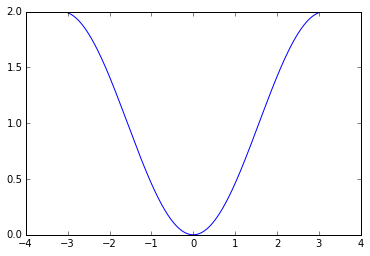

In [14]:
x = np.linspace(-np.pi, np.pi, 256)
y = 1 - np.cos(x)
plt.plot(x,y)

You can clearly see that the multiplicity is even. Now I am going to check for the first $k$ such that $\lim_{x \to 0} \frac{1-cos(x)}{x^k} = c$ such that $c \neq 0$. Since we know the root is even, I am going to start with 2!

$\lim_{x \to 0} \frac{1-cos(x)}{x^2} = \frac{0}{0}$. So by L'hôpital's rule we now have, $\lim_{x \to 0} \frac{sin(x)}{2x} = \frac{0}{0}$. And L'hôpital again!!! $\lim_{x \to 0} \frac{cos(x)}{2} = \frac{1}{2}$.  
Hence 2 is indeed the multiplicity of $1-cos(x)$!

###b)
Evaluate the forward and backward errors of the approximate root $\check{r}=0.001$.

The forward error is $|r-\check{r}|$ hence we have $|r-\check{r}|=|0-0.001|=0.001$ as our forward error.

The backward error is $|f(\check{r})|$. so $|f(\check{r})|=|1-cos(\check{r})|$

In [24]:
##Calculation for the backward error!
from math import cos
f = lambda x: 1-cos(x)
print(f(.001))


4.999999583255033e-07


Hence our backward error is 4.999999583255033e-07


##Problem 4

Show that Newton's method applied to $$f(x)=x^k-a $$ leads the FPI with function $$g(x)=\frac{(k-1)x+\frac{a}{x^{k-1}}}{k} $$
Then verify mathematically that this has super-linear convergence.

Note that $f'(x)=kx^{k-1}$. Let $$g(x)=x-\frac{f(x)}{f'(x)}$$

Hence, 
\begin{align*}
    g(x)=x-\frac{f(x)}{f'(x)}=x-\frac{x^k-a}{kx^{k-1}}
    =& \frac{(kx^{k-1})x-(x^k-a)}{kx^{k-1}}=\frac{kx^k-x^k+a}{kx^{k-1}}=\frac{(k-1)x^k}{kx^{k-1}}+\frac{a}{kx^{k-1}}=\frac{(k-1)x}{k}+\frac{a}{kx^{k-1}}=\frac{(k-1)x+\frac{a}{x^{k-1}}}{k}
\end{align*}

Now to determine if the convergence is super-linear we need to see if $|g'(r)| = 0$. Solving $$f(x)=0=x^k-a$$ yields the root $x=a^{1/k}$.

$$g'(x)=\frac{k-1}{k}x+\frac{a}{kx^{k-1}}=\frac{k-1}{k}+\frac{0-a[k(k-1)x^{k-1}]}{(kx^{k-1})^2}=\frac{k-1}{k}-\frac{a(k-1)}{kx^k} $$
Hence plugging in $r=a^{1/k}$ for $x$ yields $$\frac{1-k}{k}-\frac{a(k-1)}{k(a^{1/k})^k}= \frac{1-k}{k}-\frac{a(1-k)}{ak}= \frac{1-k}{k}-\frac{1-k}{k}=0$$

Therefore we have super-linear convergence!